##### Video Explanation: https://drive.google.com/file/d/1ijq1OBSUFwNivYDXXnOLkQn5vPdue1S4/view?usp=sharing

In [1]:
# importing initial necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df = pd.read_csv('airbnb.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [5]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [6]:
# for regression following columns are not required. We can drop them. 
# id
# description - amenities explain everything. 
# name
# city, neighbourhood, zipcode - the latitude & longitude captures it. one hot encoding doesnt solve it. 
# thumbnail_url - not useful for regression
unwanted_cols = ['id','description','name','city','neighbourhood','zipcode','thumbnail_url']
df_with_dropped_cols = df.drop(unwanted_cols, axis = 1)
df_with_dropped_cols.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,first_review,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,18-06-2016,...,NaN,26-03-2012,f,18-07-2016,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,05-08-2017,...,100%,19-06-2017,t,23-09-2017,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,30-04-2017,...,100%,25-10-2016,t,14-09-2017,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,NaN,...,NaN,19-04-2015,f,NaN,37.772004,-122.431619,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,12-05-2015,...,100%,01-03-2015,t,22-01-2017,38.925627,-77.034596,4,40.0,0.0,1.0


In [7]:
df_with_dropped_cols.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [8]:
# filling the missing values
df_with_dropped_cols['bathrooms'] = df_with_dropped_cols['bathrooms'].fillna(df_with_dropped_cols['bathrooms'].mode()[0])
df_with_dropped_cols['first_review'] = df_with_dropped_cols['first_review'].fillna(df_with_dropped_cols['first_review'].mode()[0])
df_with_dropped_cols['host_has_profile_pic'] = df_with_dropped_cols['host_has_profile_pic'].fillna(df_with_dropped_cols['host_has_profile_pic'].mode()[0])
df_with_dropped_cols['host_identity_verified'] = df_with_dropped_cols['host_identity_verified'].fillna(df_with_dropped_cols['host_identity_verified'].mode()[0])

# Remove the '%' symbol and convert the values to numeric (decimal format)
df_with_dropped_cols['host_response_rate'] = df_with_dropped_cols['host_response_rate'].replace('%', '', regex=True)
df_with_dropped_cols['host_response_rate'] = pd.to_numeric(df_with_dropped_cols['host_response_rate'], errors='coerce') / 100

# Fill missing values with the mean of the 'host_response_rate' column
df_with_dropped_cols['host_response_rate'] = df_with_dropped_cols['host_response_rate'].fillna(df_with_dropped_cols['host_response_rate'].mean())

df_with_dropped_cols['host_since'] = df_with_dropped_cols['host_since'].fillna(df_with_dropped_cols['host_since'].mode()[0])
df_with_dropped_cols['last_review'] = df_with_dropped_cols['last_review'].fillna(df_with_dropped_cols['last_review'].mode()[0])
df_with_dropped_cols['review_scores_rating'] = df_with_dropped_cols['review_scores_rating'].fillna(df_with_dropped_cols['review_scores_rating'].mean())
df_with_dropped_cols['bedrooms'] = df_with_dropped_cols['bedrooms'].fillna(df_with_dropped_cols['bedrooms'].mode()[0])
df_with_dropped_cols['beds'] = df_with_dropped_cols['beds'].fillna(df_with_dropped_cols['beds'].mode()[0])

df_with_dropped_cols.isnull().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [9]:
df_with_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   first_review            74111 non-null  object 
 10  host_has_profile_pic    74111 non-null  object 
 11  host_identity_verified  74111 non-null  object 
 12  host_response_rate      74111 non-null  float64
 13  host_since              74111 non-null  object 
 14  instant_bookable        74111 non-null

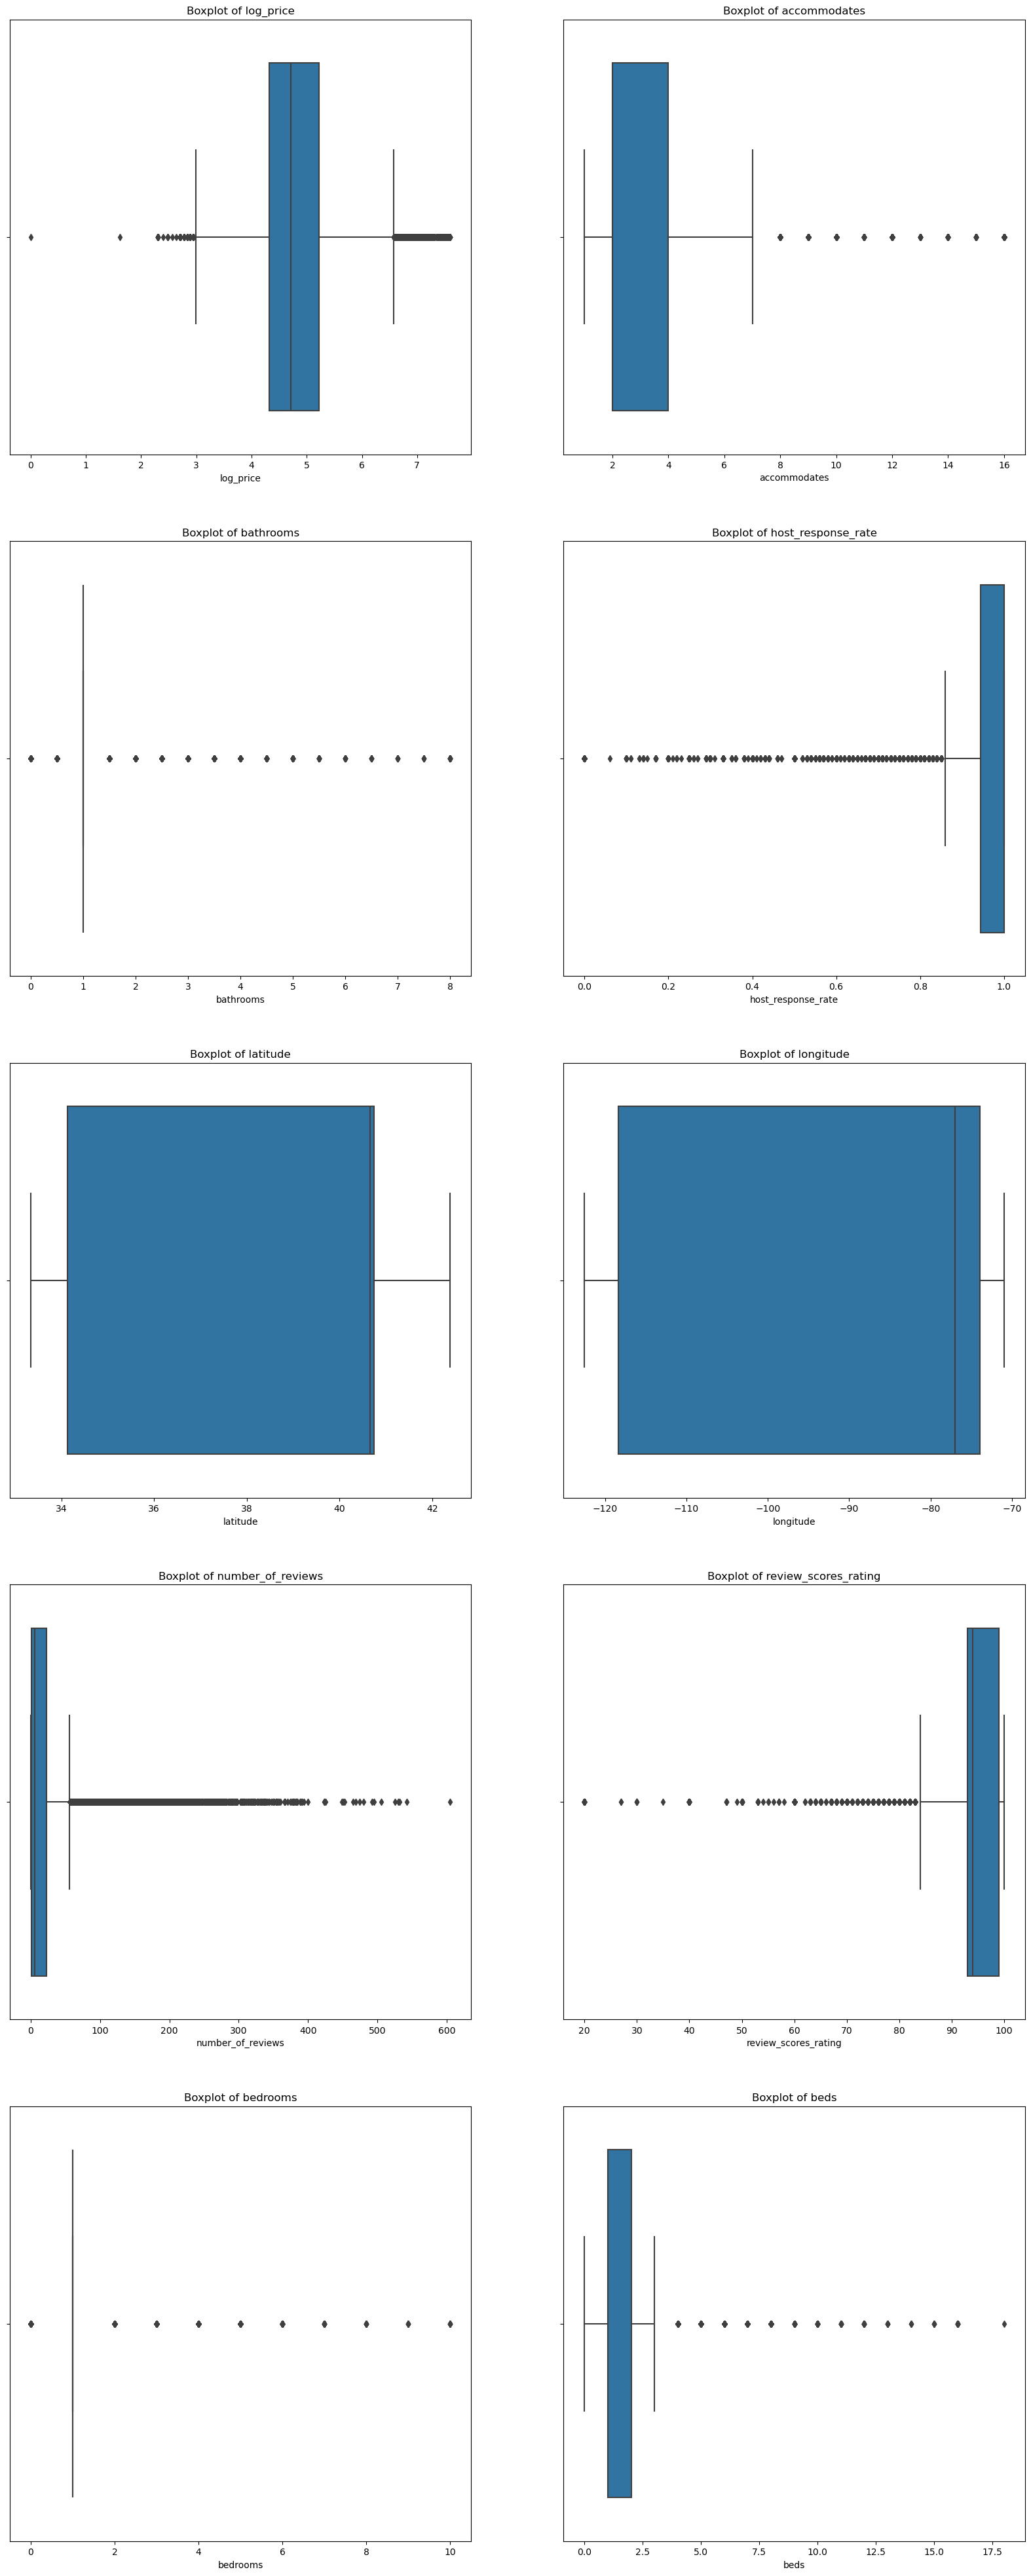

In [10]:
# identifying outliers
numeric_cols = df_with_dropped_cols.select_dtypes(include=['number'])

# Create box plots for each numeric column
plt.figure(figsize=(20,50))  # Adjust the size of the plot

# Create boxplot for each numeric column
for i, column in enumerate(numeric_cols.columns, 1):
    plt.subplot(5, 2, i)  # Adjust the grid size (2 rows, 3 columns, change as needed)
    sns.boxplot(data=df_with_dropped_cols, x=column)
    plt.title(f'Boxplot of {column}')

In [11]:
# All outlier values are feasible values hence not dropping any data point.  
df_with_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   first_review            74111 non-null  object 
 10  host_has_profile_pic    74111 non-null  object 
 11  host_identity_verified  74111 non-null  object 
 12  host_response_rate      74111 non-null  float64
 13  host_since              74111 non-null  object 
 14  instant_bookable        74111 non-null

In [12]:
# One hot encoding the categorical variables
cat_cols_except_amenities = ['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','host_has_profile_pic','host_identity_verified',
                            'instant_bookable']
df_encoded_excecpt_amenities = pd.get_dummies(df_with_dropped_cols, columns = cat_cols_except_amenities)

df_encoded_excecpt_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   log_price                            74111 non-null  float64
 1   amenities                            74111 non-null  object 
 2   accommodates                         74111 non-null  int64  
 3   bathrooms                            74111 non-null  float64
 4   first_review                         74111 non-null  object 
 5   host_response_rate                   74111 non-null  float64
 6   host_since                           74111 non-null  object 
 7   last_review                          74111 non-null  object 
 8   latitude                             74111 non-null  float64
 9   longitude                            74111 non-null  float64
 10  number_of_reviews                    74111 non-null  int64  
 11  review_scores_rating        

In [13]:
# encoding amenities 
df_encoded_excecpt_amenities['amenities_list'] = df_encoded_excecpt_amenities['amenities'].str.split(',')

# Perform One-Hot Encoding by exploding the list into multiple rows
amenities_one_hot = df_encoded_excecpt_amenities['amenities_list'].explode().str.get_dummies().groupby(level=0).sum()

# Join the one-hot encoded amenities with the original dataframe
df_encoded_final = df_encoded_excecpt_amenities.drop(columns=['amenities', 'amenities_list']).join(amenities_one_hot)

In [14]:
df_encoded_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Columns: 362 entries, log_price to {}
dtypes: bool(56), float64(8), int64(295), object(3)
memory usage: 177.0+ MB


In [15]:
object_columns = df_encoded_final.select_dtypes(include=['object']).columns
print(object_columns)

Index(['first_review', 'host_since', 'last_review'], dtype='object')


In [16]:
# Feature Engineering - creating new columns from date columns

#Number of days since last review 
df_encoded_final['last_review_date'] = pd.to_datetime(df_encoded_final['last_review'])
df_encoded_final['days_since_last_review'] = (pd.to_datetime('today') - df_encoded_final['last_review_date']).dt.days

#Number of days since hosting
df_encoded_final['host_since_date'] = pd.to_datetime(df_encoded_final['host_since'])
df_encoded_final['days_since_host_since'] = (pd.to_datetime('today') - df_encoded_final['host_since_date']).dt.days

#Number of days between first review and last review
df_encoded_final['first_review_date'] = pd.to_datetime(df_encoded_final['first_review'])
df_encoded_final['last_review_date'] = pd.to_datetime(df_encoded_final['last_review_date'])
df_encoded_final['review_duration'] = (df_encoded_final['last_review_date'] - df_encoded_final['first_review_date']).dt.days

#All these columns help in building regression model. 


C:\Users\ahire\AppData\Local\Temp\ipykernel_6852\524871215.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_encoded_final['last_review_date'] = pd.to_datetime(df_encoded_final['last_review'])
C:\Users\ahire\AppData\Local\Temp\ipykernel_6852\524871215.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_encoded_final['host_since_date'] = pd.to_datetime(df_encoded_final['host_since'])
C:\Users\ahire\AppData\Local\Temp\ipykernel_6852\524871215.py:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_encoded_final['first_review_date'] = pd.to_datetime(df_encoded_final['first_review'])


In [17]:
columns_to_drop = ['last_review', 'host_since', 'first_review', 'last_review_date', 'host_since_date', 'first_review_date']

# Drop unwanted columns
df_encoded_final.drop(columns=columns_to_drop, inplace=True)

In [18]:
df_encoded_final.head()

,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,{Pool,{Shampoo,{Stove,{TV,{TV},{Washer,{},days_since_last_review,days_since_host_since,review_duration
0,5.010635,3,1.0,0.94352,40.696524,-73.991617,2,100.000000,1.0,1.0,...,0,0,0,0,0,0,0,3070,4645,30
1,5.129899,7,1.0,1.00000,40.766115,-73.989040,6,93.000000,3.0,3.0,...,0,0,0,0,0,0,0,2638,2734,49
2,4.976734,5,1.0,1.00000,40.808110,-73.943756,10,92.000000,1.0,3.0,...,0,0,0,1,0,0,0,2647,2971,137
3,6.620073,4,1.0,0.94352,37.772004,-122.431619,0,94.067365,2.0,2.0,...,0,0,0,1,0,0,0,2784,3526,119
4,4.744932,2,1.0,1.00000,38.925627,-77.034596,4,40.000000,0.0,1.0,...,0,0,0,1,0,0,0,2882,3575,621


In [19]:
# scaling numerical variables
df_with_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   first_review            74111 non-null  object 
 10  host_has_profile_pic    74111 non-null  object 
 11  host_identity_verified  74111 non-null  object 
 12  host_response_rate      74111 non-null  float64
 13  host_since              74111 non-null  object 
 14  instant_bookable        74111 non-null

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['log_price','accommodates','bathrooms','host_response_rate','latitude','longitude','number_of_reviews',
                   'review_scores_rating','bedrooms','beds','days_since_last_review','days_since_host_since','review_duration']

df_encoded_final[columns_to_scale]=scaler.fit_transform(df_encoded_final[columns_to_scale])

df_encoded_final.head()

,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,{Pool,{Shampoo,{Stove,{TV,{TV},{Washer,{},days_since_last_review,days_since_host_since,review_duration
0,0.318608,-0.072041,-0.403569,7.828730e-16,0.730668,0.847996,-0.499640,0.860306,-0.311703,-0.566158,...,0,0,0,0,0,0,0,1.209841,1.282917,-0.730686
1,0.484855,1.785336,-0.403569,3.982706e-01,0.753262,0.848115,-0.393899,-0.154781,2.036637,1.029527,...,0,0,0,0,0,0,0,-0.883488,-1.609143,-0.688596
2,0.271352,0.856648,-0.403569,3.982706e-01,0.766896,0.850201,-0.288158,-0.299794,-0.311703,1.029527,...,0,0,0,1,0,0,0,-0.839877,-1.250473,-0.493654
3,2.562075,0.392303,-0.403569,7.828730e-16,-0.218806,-1.383730,-0.552510,0.000000,0.862467,0.231684,...,0,0,0,1,0,0,0,-0.176020,-0.410550,-0.533529
4,-0.051767,-0.536385,-0.403569,3.982706e-01,0.155729,0.707800,-0.446769,-7.840446,-1.485873,-0.566158,...,0,0,0,1,0,0,0,0.298855,-0.336395,0.578525


In [21]:
# Lets build a linear regression model using statmodels so that we will know important columns then we can delete unwanted ones. 

#Separating features and target variable
X = df_encoded_final.drop(columns=['log_price']) 
y = df_encoded_final['log_price']

from sklearn.model_selection import train_test_split

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# let us get p values for the linear regression coefficients to delete the unwanted columns 

import statsmodels.api as sm

# float x_train, y_train
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Fitting the linear regression model
model = sm.OLS(y_train, X_train).fit()

pd.set_option('display.max_rows', None)

# Get p-values for the coefficients
#print("Coefficients:")
#print(model.params)

#print("\nP-values:")
#print(model.pvalues)

# Getting a detailed summary of the model
# Get the summary as a table
summary_frame = model.summary2().tables[1]  # Extracting the coefficients table
summary_frame_sorted = summary_frame.sort_values(by='P>|t|', ascending=False)  # Sort by p-values

# Saving to CSV
summary_frame_sorted.to_csv('ols_summary_sorted.csv')

# Print sorted summary
print(summary_frame_sorted)


                                                       Coef.      Std.Err.  \
Microwave}                                     -1.847477e-03  3.261092e-01   
Kitchen}                                       -9.124845e-04  1.107074e-01   
property_type_Chalet                           -3.152787e-03  2.883635e-01   
 smooth pathway to front door"                  1.604804e-03  9.018450e-02   
"Pets live on this property"}                  -1.452080e-02  6.487902e-01   
property_type_Other                             1.928200e-03  5.402307e-02   
instant_bookable_t                              8.449441e-04  1.612505e-02   
"Handheld shower head"                          1.798749e-02  3.078977e-01   
"High chair"}                                  -1.008437e-02  1.556073e-01   
"Patio or balcony"                              2.115575e-03  3.183868e-02   
{"Wireless Internet"}                           1.914936e-02  2.670846e-01   
"Hot water kettle"}                             4.995418e-03  6.

In [31]:
# considering only significant variables based on p value less than 0.05. 
selected_variables = ['Crib}', '"Host greets you"', '"Laptop friendly workspace"', 'Breakfast', 'property_type_Boutique hotel', 
                      '"Smart lock"', '"Wide clearance to shower and toilet"', '"Room-darkening shades"}', '"Pets allowed"', 
                      'bed_type_Airbed', '"Window guards"', '"Outlet covers"', '"Family/kid friendly"}', '"Baby bath"', '{"Host greets you"}', 
                      '{Kitchen}', 'instant_bookable_f', 'property_type_Boat', '"Window guards"}', '"Pets allowed"}', '"First aid kit"', 
                      '{"Cable TV"', 'property_type_Guest suite', '"Coffee maker"', '"Stair gates"', '"Private entrance"', '"Host greets you"}', 
                      '"Luggage dropoff allowed"', 'Beachfront}', '"Room-darkening shades"', 'Washer', '"Suitable for events"}', 
                      '"Garden or backyard"}', 'Dog(s)', 'Refrigerator', 'Cat(s)', '"Bed linens"}', 'property_type_Hut', 'property_type_Camper/RV', 
                      '{Heating', 'property_type_In-law', 'host_identity_verified_f', 'host_has_profile_pic_t', 'Crib', '"Long term stays allowed"}', 
                      'property_type_Townhouse', '"Private entrance"}', 'property_type_Bungalow', '"24-hour check-in"', 
                      '"translation missing: en.hosting_amenity_49"}', 'bed_type_Couch', 'Iron}', '"Pets live on this property"', 
                      '"Laptop friendly workspace"}', '"Wheelchair accessible"', '"Doorman Entry"}', '{"Suitable for events"', 
                      'host_has_profile_pic_f', 'cleaning_fee_False', '"Dishes and silverware"', '"Private living room"', '{"Fire extinguisher"}', 
                      'Doorman}', 'property_type_Tent', 'Essentials', 'Microwave', 'property_type_Guesthouse', 'cancellation_policy_super_strict_60', 
                      'room_type_Private room', '"Carbon monoxide detector"', '"translation missing: en.hosting_amenity_50"}', 'property_type_House', 
                      '"Smoking allowed"', '"Self Check-In"', 'Heating}', '"Free parking on street"', 'property_type_Apartment', 
                      'property_type_Timeshare', 'Bathtub}', 'Dryer}', '"Lock on bedroom door"', '{}', 'Dryer', '"Fire extinguisher"', 
                      'cancellation_policy_flexible', 'Internet', 'Heating', 'Kitchen', 'Hangers', 'cancellation_policy_strict', 
                      '"Air conditioning"', 'cancellation_policy_moderate', 'Dishwasher', '"Suitable for events"', 'Shampoo', 
                      'days_since_last_review', 'host_response_rate', '"Hair dryer"', 'Gym', 'number_of_reviews', 'property_type_Hostel', 
                      'Doorman', 'property_type_Dorm', '"Buzzer/wireless intercom"', 'beds', '"Cable TV"', 'days_since_host_since', 
                      '"Free parking on premises"', 'review_scores_rating', '"Indoor fireplace"', 'longitude', 'latitude', 'Elevator', 
                      'bathrooms', 'bedrooms', 'room_type_Shared room', 'room_type_Entire home/apt', 'accommodates' ]



X_train_selected_variables = X_train[selected_variables]
y_train_selected_variables = y_train

X_test_selected_variables = X_test[selected_variables]
y_test_selected_variables = y_test

model = sm.OLS(y_train_selected_variables, X_train_selected_variables).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     684.0
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:33:15   Log-Likelihood:                -59072.
No. Observations:               59288   AIC:                         1.184e+05
Df Residuals:                   59172   BIC:                         1.194e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [23]:
# R_squared from Linear Regression - OLS = 0.57

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

#did not select SVR because it is taking lot of time to run the pregram - it is like infinity loop

In [27]:
# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

In [33]:
# Trainning and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train_selected_variables, y_train_selected_variables)
    y_pred_selected_variables = model.predict(X_test_selected_variables)
    
    r2 = r2_score(y_test_selected_variables, y_pred_selected_variables)
    rmse = np.sqrt(mean_squared_error(y_test_selected_variables, y_pred_selected_variables))
    results[name] = {'R2 Score': r2, 'RMSE': rmse}
    print(f"{name} - R2 Score: {r2:.3f}, RMSE: {rmse:.3f}")

Linear Regression - R2 Score: -234931294673366848.000, RMSE: 484263221.336
Decision Tree - R2 Score: 0.430, RMSE: 0.754
Random Forest - R2 Score: 0.713, RMSE: 0.535


In [ ]:
# Linear regression is giving wrong output hence to be ignored.(OLS giving R2 Score to be 0.57) 
# Best Model is Random Forest as R2 score is highest = 0.713

#We can predict new datapoints but we have to go through all the steps of data transformation & feature engineering.  